## Import the Libraries

In [13]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

## Import the dataset

I used MNIST Fashion Dataset in this project. Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

In [2]:
image_data = tf.keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images,test_labels) = image_data.load_data()
train_images = train_images/255.0
test_images = test_images/255.0
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### To see the images

0

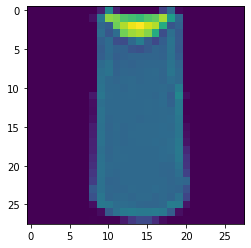

In [5]:
plt.imshow(train_images[2]);
train_labels[2]

## Define Model

I used Keras Sequential Model in this project. I used ReLU activation function, and 10 output layers.
I tried my model with 10 iterations, so as a result of this iterations my model accuracy score was 0.91. After that I tried my model with 20 iterations and lastly my model accuracy score increased 0.93. 

In [6]:
model = tf.keras.Sequential([
                            tf.keras.layers.Flatten(input_shape=(28,28)),
                            tf.keras.layers.Dense(128, activation='relu'),
                            tf.keras.layers.Dense(60, activation='relu'),
                            tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ["accuracy"]
             )
model.fit(train_images, train_labels,epochs=20)

Epoch 1/20


C:\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 4s 2ms/step - loss: 0.4909 - accuracy: 0.8233
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3678 - accuracy: 0.8663
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3328 - accuracy: 0.8769
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3094 - accuracy: 0.8854
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2910 - accuracy: 0.8929
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2782 - accuracy: 0.8971
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2658 - accuracy: 0.9012
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2532 - accuracy: 0.9049
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2443 - accuracy: 0.9083
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2366 - accurac

In [7]:
test_loss, test_acc = model.evaluate(test_images,test_labels, verbose=2)
print('\nTest Accuracy: ', round(test_acc,2))

313/313 - 1s - loss: 0.3806 - accuracy: 0.8886 - 1s/epoch - 3ms/step

Test Accuracy:  0.89


## Evaluate the model

My model accuracy score is .89 on the test dataset. So, it is acceptable value.

In [36]:
model.predict(test_images)[0]

313/313 [==============================] - 1s 2ms/step


array([4.9516963e-08, 6.5673907e-05, 3.4437220e-10, 6.6316619e-09,
       5.1812282e-10, 3.0022034e-05, 3.7639905e-09, 3.3995471e-04,
       2.4563079e-12, 9.9956423e-01], dtype=float32)

## Make prediction

I try my model on the first label. And, after working, model gave me some probabilities about the class. As a result, I can say that the model predict this label is belong to the last class. So, the model can predict true this label.

## Using graph for predictions

I used graph if the prediction is correct bar's color is blue if not bar's color is red and also I can see the correct label with blue color.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

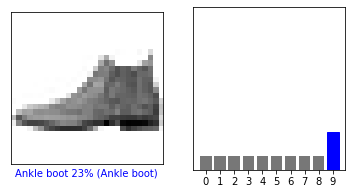

In [17]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

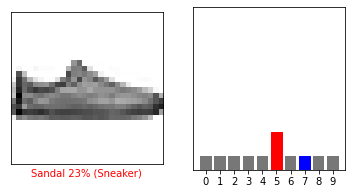

In [18]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

## Evalute the predictions

The model can predict true